In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir_mixavg.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12],parse_dates=['date'], skipinitialspace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,o3
0,2018-01-01,48.645833,0.985,74.200,29.33,119.500,21.000000,27.1,70,1009.40,100.0,9.0,37.91
1,2018-01-02,57.020833,1.015,73.000,35.13,124.200,26.000000,27.5,67,1009.40,120.0,4.0,38.22
2,2018-01-03,73.854167,1.290,98.500,43.54,156.500,38.000000,28.2,66,1009.40,60.0,4.0,29.50
3,2018-01-04,85.062500,1.310,92.400,42.46,155.200,39.000000,29.3,64,1009.40,330.0,6.0,45.09
4,2018-01-05,91.812500,1.175,51.100,48.80,111.900,51.000000,30.4,63,1009.40,NaN,NaN,49.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50.000000,1.000,71.465,27.80,99.315,14.333333,28.5,79,1009.24,120.0,9.0,16.91
1761,2022-10-28,57.666667,1.100,84.335,31.65,115.985,17.000000,29.6,72,1009.24,170.0,7.0,17.96
1762,2022-10-29,58.000000,0.900,56.865,33.90,90.775,18.333333,29.5,62,1009.24,120.0,13.0,33.70
1763,2022-10-30,72.666667,1.100,56.145,44.90,101.030,29.000000,30.0,62,1009.24,120.0,13.0,45.26


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   float64       
 2   co                1765 non-null   float64       
 3   no                1765 non-null   float64       
 4   no2               1765 non-null   float64       
 5   nox               1765 non-null   float64       
 6   pm25              1708 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
 12  o3                1701 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 179.4 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,o3
0,2018-01-01,48.645833,0.985,74.200,29.33,119.500,21.000000,27.1,70,1009.40,100.0,9.0,37.91
1,2018-01-02,57.020833,1.015,73.000,35.13,124.200,26.000000,27.5,67,1009.40,120.0,4.0,38.22
2,2018-01-03,73.854167,1.290,98.500,43.54,156.500,38.000000,28.2,66,1009.40,60.0,4.0,29.50
3,2018-01-04,85.062500,1.310,92.400,42.46,155.200,39.000000,29.3,64,1009.40,330.0,6.0,45.09
4,2018-01-05,91.812500,1.175,51.100,48.80,111.900,51.000000,30.4,63,1009.40,NaN,NaN,49.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50.000000,1.000,71.465,27.80,99.315,14.333333,28.5,79,1009.24,120.0,9.0,16.91
1761,2022-10-28,57.666667,1.100,84.335,31.65,115.985,17.000000,29.6,72,1009.24,170.0,7.0,17.96
1762,2022-10-29,58.000000,0.900,56.865,33.90,90.775,18.333333,29.5,62,1009.24,120.0,13.0,33.70
1763,2022-10-30,72.666667,1.100,56.145,44.90,101.030,29.000000,30.0,62,1009.24,120.0,13.0,45.26


In [8]:
y_col='pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,o3
0,2018-01-01,48.645833,0.985,74.200,29.33,119.500,21.000000,27.1,70,1009.40,100.0,9.0,37.91
1,2018-01-02,57.020833,1.015,73.000,35.13,124.200,26.000000,27.5,67,1009.40,120.0,4.0,38.22
2,2018-01-03,73.854167,1.290,98.500,43.54,156.500,38.000000,28.2,66,1009.40,60.0,4.0,29.50
3,2018-01-04,85.062500,1.310,92.400,42.46,155.200,39.000000,29.3,64,1009.40,330.0,6.0,45.09
4,2018-01-05,91.812500,1.175,51.100,48.80,111.900,51.000000,30.4,63,1009.40,NaN,NaN,49.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2022-10-27,50.000000,1.000,71.465,27.80,99.315,14.333333,28.5,79,1009.24,120.0,9.0,16.91
1704,2022-10-28,57.666667,1.100,84.335,31.65,115.985,17.000000,29.6,72,1009.24,170.0,7.0,17.96
1705,2022-10-29,58.000000,0.900,56.865,33.90,90.775,18.333333,29.5,62,1009.24,120.0,13.0,33.70
1706,2022-10-30,72.666667,1.100,56.145,44.90,101.030,29.000000,30.0,62,1009.24,120.0,13.0,45.26


In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data)

In [12]:
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,o3,year,month,day,day_name
0,2018-01-01,48.645833,0.985,74.200,29.33,119.500,21.000000,27.1,70,1009.40,100.0,9.0,37.91,2018,1,1,Monday
1,2018-01-02,57.020833,1.015,73.000,35.13,124.200,26.000000,27.5,67,1009.40,120.0,4.0,38.22,2018,1,2,Tuesday
2,2018-01-03,73.854167,1.290,98.500,43.54,156.500,38.000000,28.2,66,1009.40,60.0,4.0,29.50,2018,1,3,Wednesday
3,2018-01-04,85.062500,1.310,92.400,42.46,155.200,39.000000,29.3,64,1009.40,330.0,6.0,45.09,2018,1,4,Thursday
4,2018-01-05,91.812500,1.175,51.100,48.80,111.900,51.000000,30.4,63,1009.40,NaN,NaN,49.26,2018,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2022-10-27,50.000000,1.000,71.465,27.80,99.315,14.333333,28.5,79,1009.24,120.0,9.0,16.91,2022,10,27,Thursday
1704,2022-10-28,57.666667,1.100,84.335,31.65,115.985,17.000000,29.6,72,1009.24,170.0,7.0,17.96,2022,10,28,Friday
1705,2022-10-29,58.000000,0.900,56.865,33.90,90.775,18.333333,29.5,62,1009.24,120.0,13.0,33.70,2022,10,29,Saturday
1706,2022-10-30,72.666667,1.100,56.145,44.90,101.030,29.000000,30.0,62,1009.24,120.0,13.0,45.26,2022,10,30,Sunday


In [13]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'o3', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2018-01-01,2018,1,1,Monday,21.000000
1,2018-01-02,2018,1,2,Tuesday,26.000000
2,2018-01-03,2018,1,3,Wednesday,38.000000
3,2018-01-04,2018,1,4,Thursday,39.000000
4,2018-01-05,2018,1,5,Friday,51.000000
...,...,...,...,...,...,...
1703,2022-10-27,2022,10,27,Thursday,14.333333
1704,2022-10-28,2022,10,28,Friday,17.000000
1705,2022-10-29,2022,10,29,Saturday,18.333333
1706,2022-10-30,2022,10,30,Sunday,29.000000


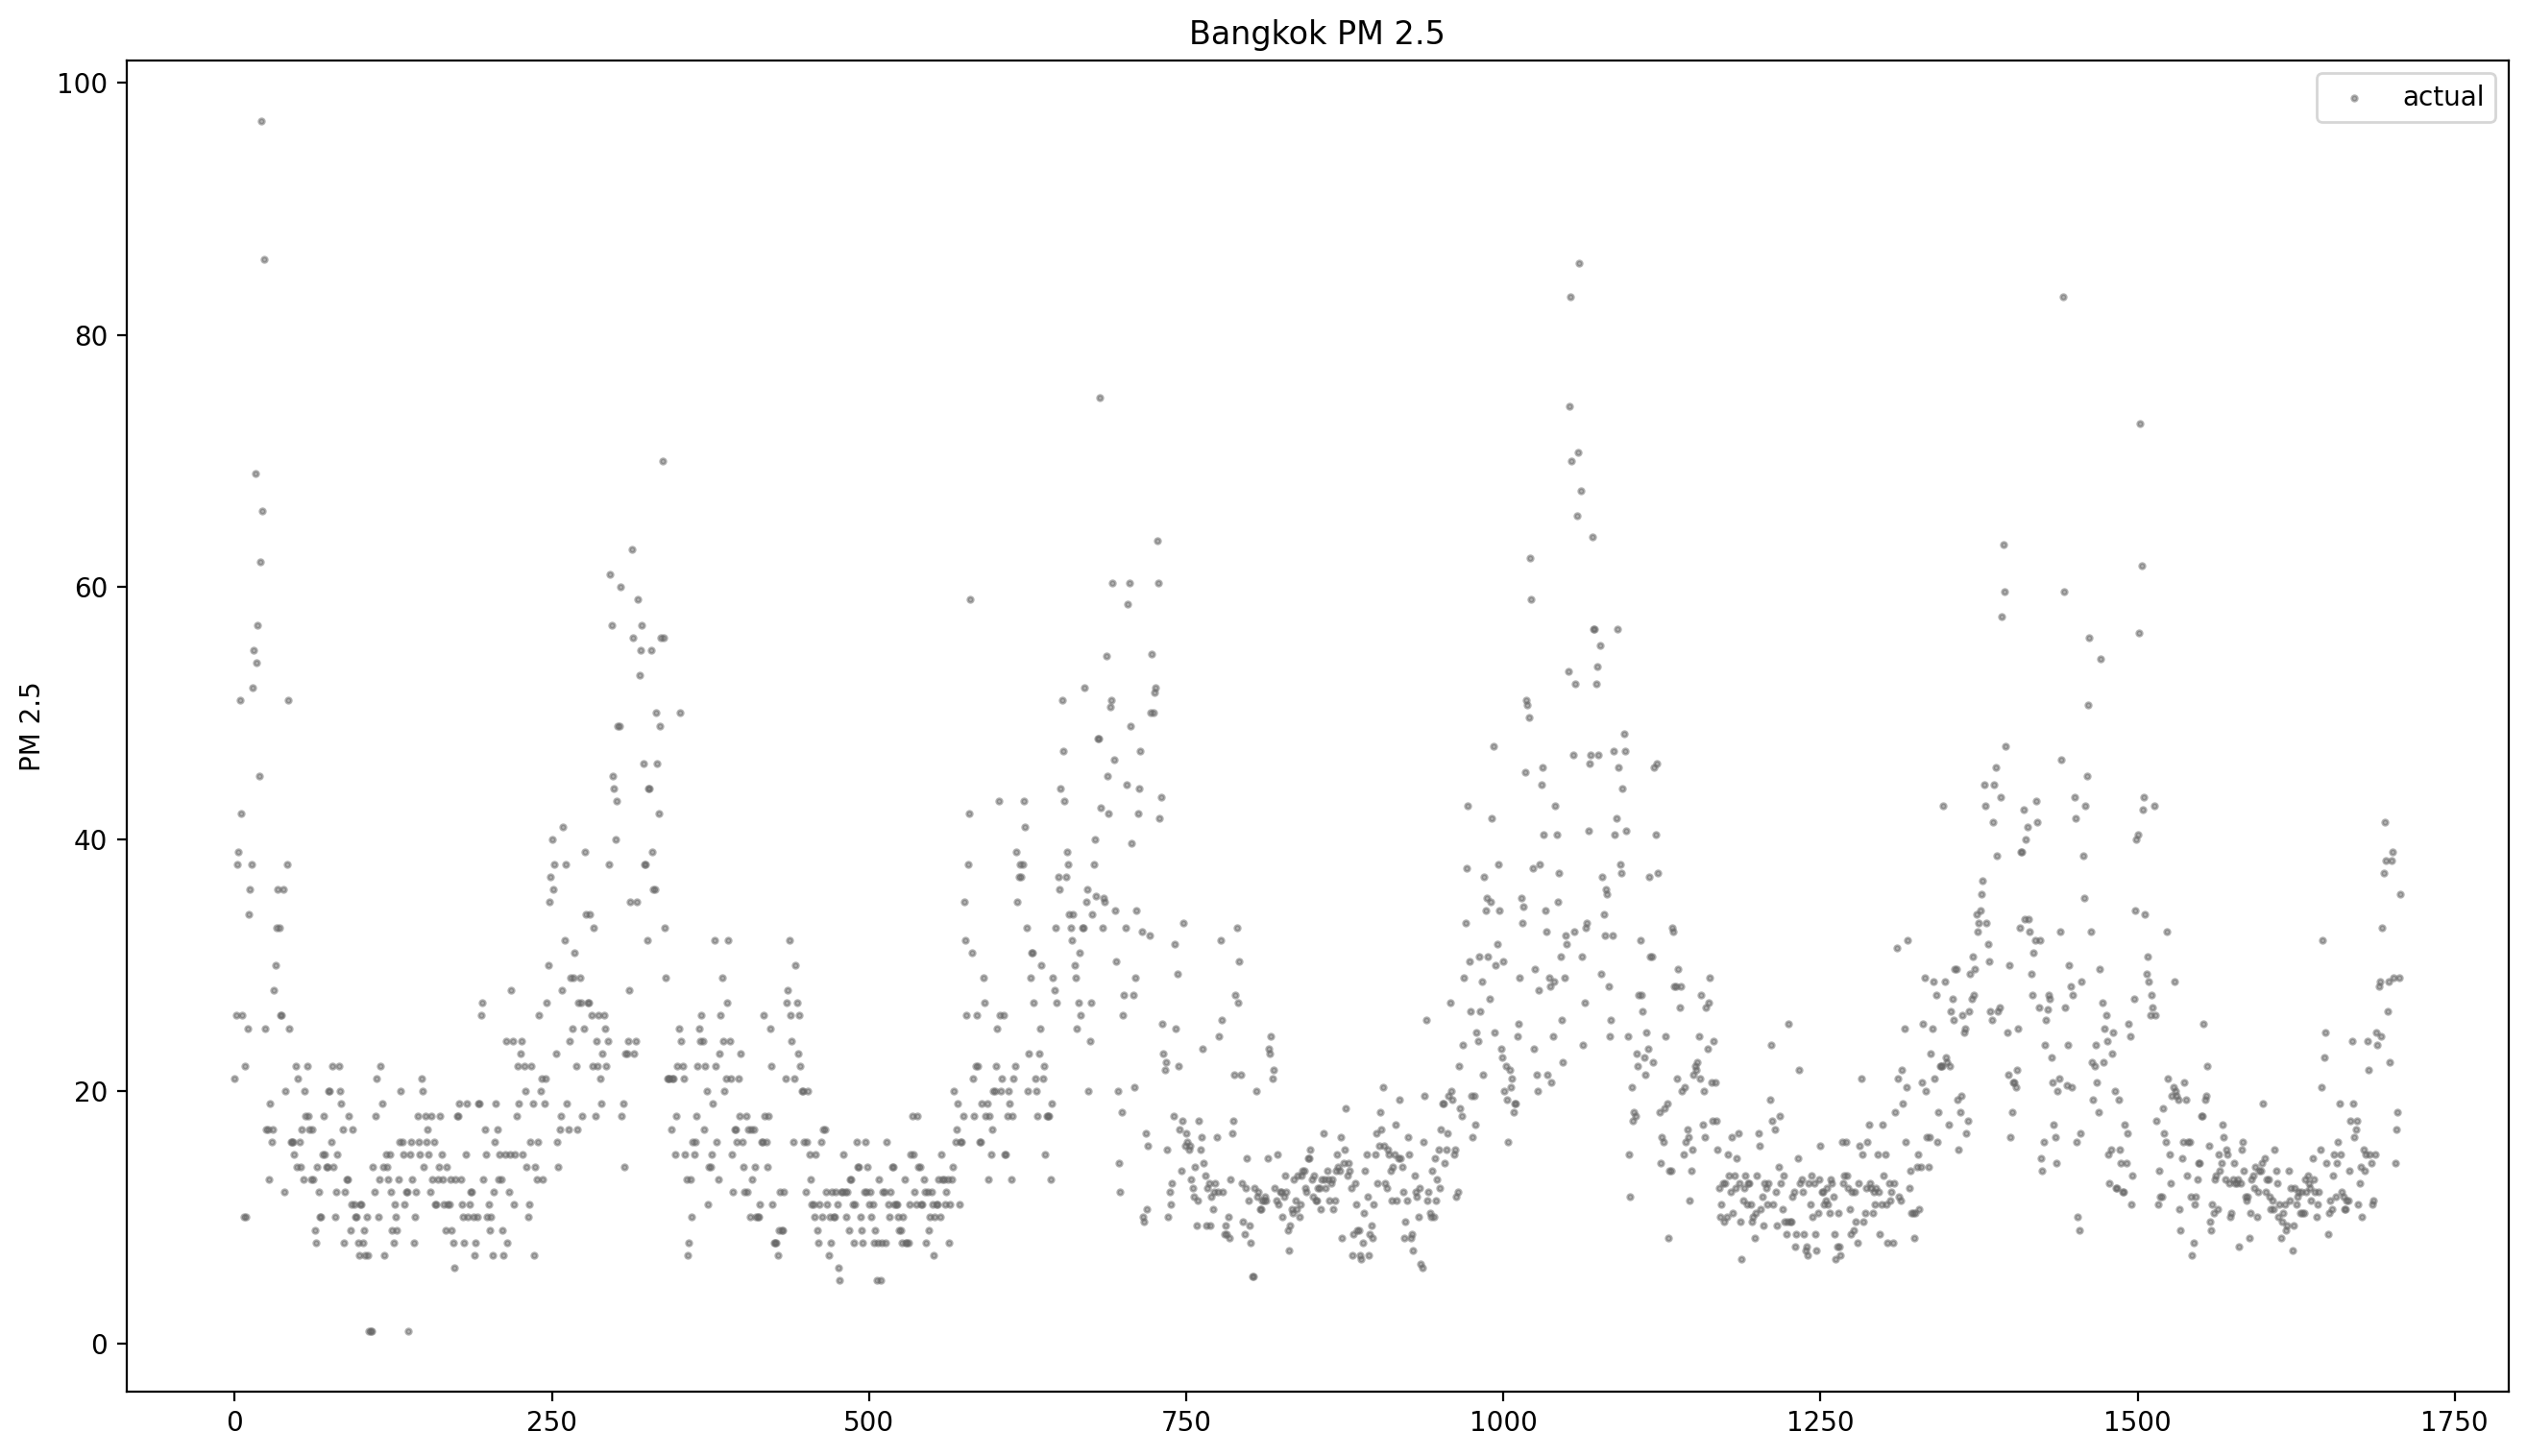

In [15]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [16]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [17]:
df=data.copy()
df['y']=df['pm25'].shift(-1)


In [18]:
train=df[:-8]
test=df[-8:]
test=test.drop(test.tail(1).index)

In [19]:
X_train = train['y'].values.reshape(-1,1)
y_test = test['pm25'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test =test['pm25'].values.reshape(-1,1)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train, y=y_train.ravel())
reg_pred = reg.predict(X_test)
test['gbr_pred'] = reg_pred
test

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,o3,year,month,day,day_name,y,gbr_pred
1700,2022-10-24,86.000000,1.25,46.575,47.60,94.155,38.333333,30.7,76,1009.24,130.0,9.0,37.70,2022,10,24,Monday,39.000000,38.245067
1701,2022-10-25,92.000000,1.40,67.905,51.95,119.920,39.000000,30.9,72,1009.24,340.0,7.0,45.52,2022,10,25,Tuesday,29.000000,39.020644
1702,2022-10-26,77.333333,1.30,75.690,48.45,124.145,29.000000,30.3,69,1009.24,110.0,7.0,31.61,2022,10,26,Wednesday,14.333333,28.969631
1703,2022-10-27,50.000000,1.00,71.465,27.80,99.315,14.333333,28.5,79,1009.24,120.0,9.0,16.91,2022,10,27,Thursday,17.000000,14.334064
1704,2022-10-28,57.666667,1.10,84.335,31.65,115.985,17.000000,29.6,72,1009.24,170.0,7.0,17.96,2022,10,28,Friday,18.333333,16.966417
1705,2022-10-29,58.000000,0.90,56.865,33.90,90.775,18.333333,29.5,62,1009.24,120.0,13.0,33.70,2022,10,29,Saturday,29.000000,18.217427
1706,2022-10-30,72.666667,1.10,56.145,44.90,101.030,29.000000,30.0,62,1009.24,120.0,13.0,45.26,2022,10,30,Sunday,35.666667,28.969631


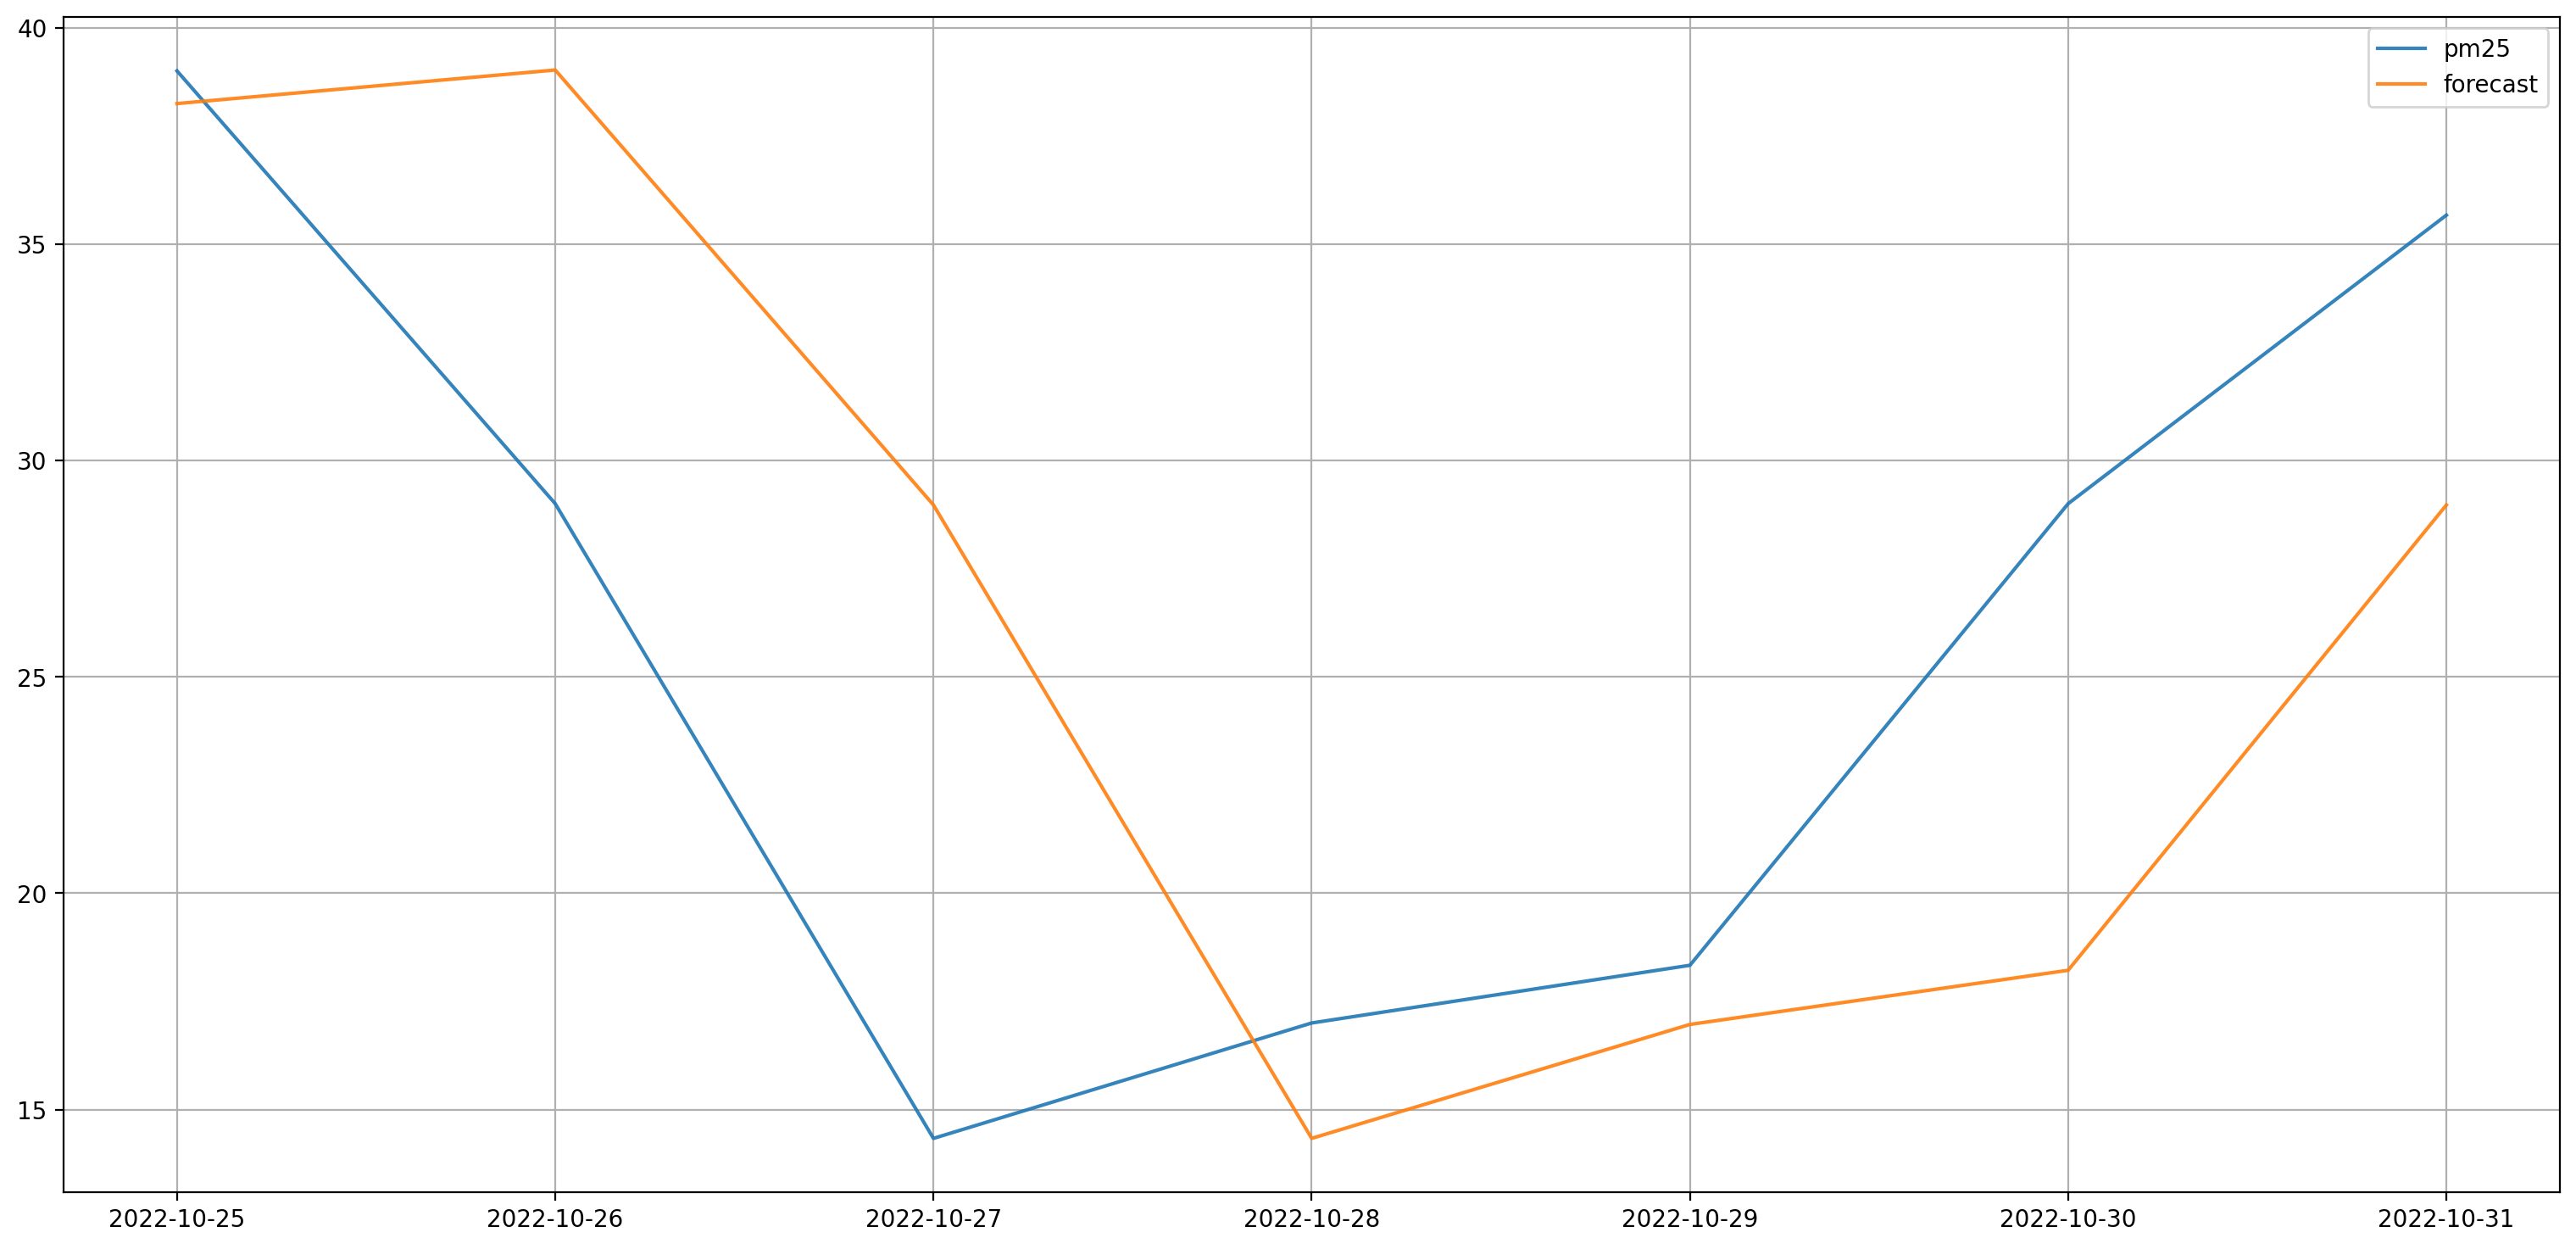

In [21]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [22]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [24]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7f01e00186d0>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F01DF19D340)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F01DF19D340)],
        [DecisionTreeRegressor(criterion='fried

In [ ]:
#reg.predict(X_test)

In [25]:
yhat=[]
yhat = reg.predict(X_test)

In [26]:
Y_Pred=reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 0.0035177557316023586
Rmse 0.059310671313030666


In [27]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,38.0
1,39.0
2,29.0
3,14.0
4,17.0
5,18.0
6,29.0


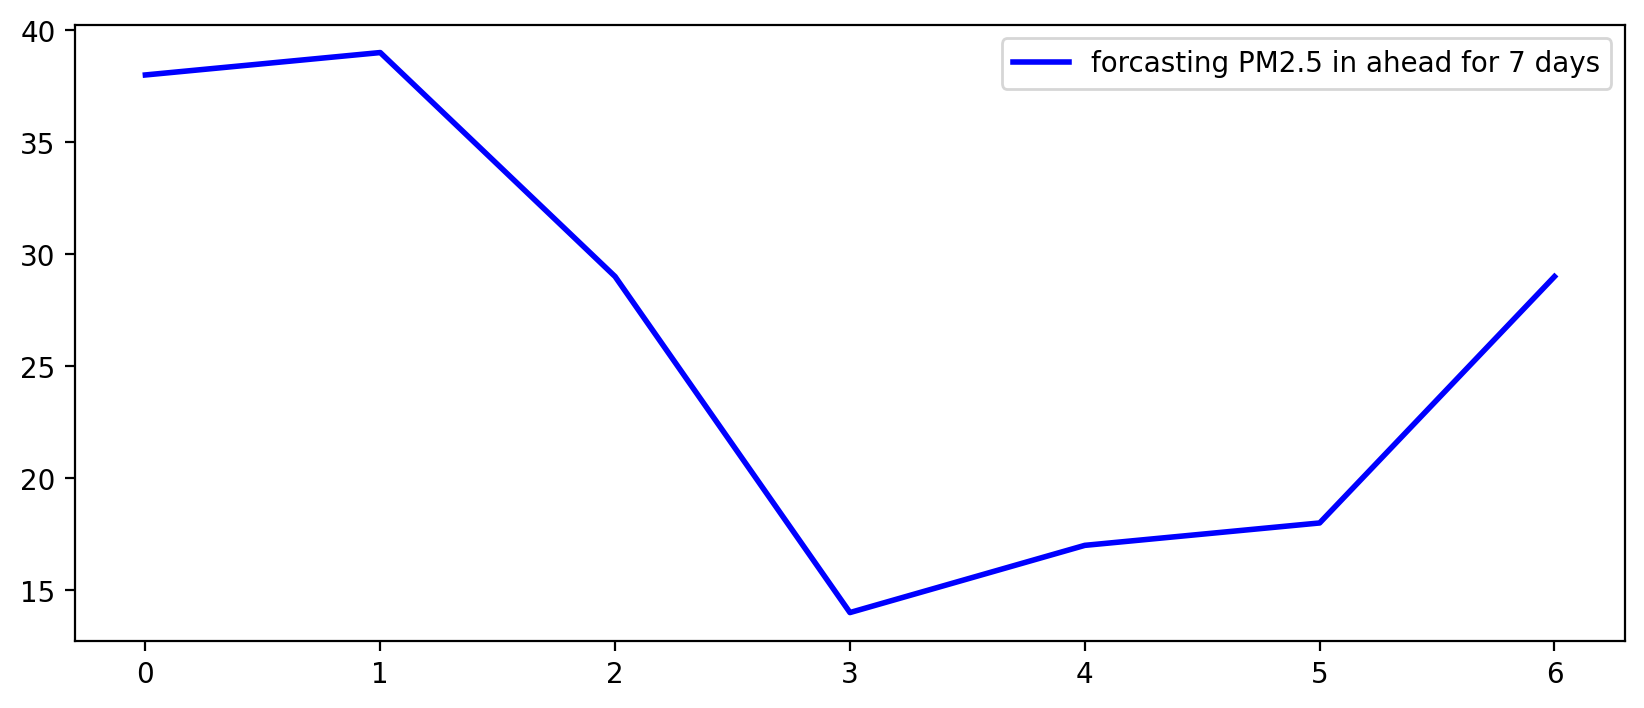

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()